# Анализ рынков дистрибьюции видеоигр интернет-магазина «Стримчик» (Сборный проект 1)
---

**Описание проекта**: провести анализ рынков сбыта видеоигр на основе данных из открытых источников.


**Цель исследования** : выявить определяющие успешность игры закономерности. Определить потенциальные популярные продукты, определиться с рекламными компаниями, а также рассмотреть наиболее популярные рынки сбыта и жанры. 

**Ход исследования**:

- [Обзор стартовых данных](#first);
- [Предобработка данных](#second)
  - Замена названия столбцов;
  - Преобразование формата данных;
  - Анализ и обработка пропущенных данных, дубликатов;
  - Добавление суммарных продаж по регионам.
- [Исследование данных](#third);
- [Анализ предпочтений игроков](#forth);
- [Проверка представленных гипотез](#fifth);
- [Вывод](#total).

**Вывод** : игровой рынок явдяется в данный момент одним из наиболее популярных и быстро изменяющимся. Исследование дистрибьюции, поможет определить интересы пользователей в различных регионах и повышению роста продаж.

### Обзор предобработанных данных
----
<a id='first'></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from matplotlib.ticker import MaxNLocator

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.info())
display(data.shape)
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

(16715, 11)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В ходе предварительного просмотра данных, можно увидеть, что данные распределились соответсвенно столбцам, не присутствует разделителей. В колонке рейтинг присутсвует обозначения `ESRB`, для лучшего понимания рейтинга следует составить столбец с возрастом выраженным в соответсвии с **[ESRB](https://www.esrb.org/ratings-guide/)**. Присутствуют большое кол-во пропущенных данных в оценках пользователей и критиков, а также возрастного рейтинга. Пропущенные значения могут быть обусловлены тем, что на момент выхода видеоигры были не сформированы возрастные рейтинги, а также не было различных оценочных агрегаторов, собирающих кол-во оценок. Также следует привести к верному формату год реализации, оценку игроков, т.к в данный момент они представленый форматом object.

### Предобработка данных
----
<a id='second'></a>

#### Привидение колонок к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()

Колонки датасета были приведены к нижнему регистру.

#### Изменение типа данных

In [4]:
tbd_count = data.query('user_score.eq("tbd")')['name'].count()

print(f"Кол-во пропущенных пользовательских оценок: {data['user_score'].isna().sum()}")
print(f"Кол-во пропущенных пользовательских оценок (tbd): {tbd_count}")

Кол-во пропущенных пользовательских оценок: 6701
Кол-во пропущенных пользовательских оценок (tbd): 2424


В пользовательских оценках, присутсвует значение "tbd" - это означает, что оценка не сформирована, оценило недостаточное кол-во пользователей для выставления оценки. Сл-но его следует заменить на пропуски. 

In [5]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [6]:
display(data.loc[data['year_of_release'].isna()==True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
query_string = 'genre.eq("Sports") and year_of_release.isna().eq(True)'
display(f"Кол-во спортивных игр с пропущенной датой: {data.query(query_string)['name'].count()}")
display(data.query('genre.eq("Sports") and year_of_release.isna().eq(True)')['name'])

'Кол-во спортивных игр с пропущенной датой: 42'

183                             Madden NFL 2004
377                            FIFA Soccer 2004
1301                             Triple Play 99
2479                              Madden NFL 07
2492                         MLB SlugFest 20-03
2536                   Shaun White Snowboarding
2572             PES 2009: Pro Evolution Soccer
2849                              Madden NFL 11
3413                              Madden NFL 06
3486                            Madden NFL 2002
3739                          NBA Street Vol. 2
3883                              Fishing Derby
4205                    Tiger Woods PGA Tour 07
4635                               NHL Slapshot
4775                           NFL GameDay 2003
5156                              NBA Live 2003
5655                     All-Star Baseball 2005
5889                              NBA Live 2003
6624                          College Hoops 2K6
6636                 Jonah Lomu Rugby Challenge
6999                   Tony Hawk's Downh

In [8]:
#data = data.query('year_of_release.isna() != True')
data['year_of_release'] = data['year_of_release'].dropna()

In [9]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y', errors = 'coerce').dt.year

In [10]:
display(data.info())
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Типы данных в колонках year_of_release, user_score были приведены к стандартному виду формата.

В колонке дата, игры с пропусками в дате были устранены., т.к. заполнение без информации не представляется возможным, можно обработать значения в названии тайтла, так как в спортивных симуляторах используют год в названии игры, но :
    
    1) Таких тайтлов всего 42, использующих полностью год в названии 11, еще 9 используют сокращенное название;

    2) Замещение года в столбце датасета, может искозить данные, т.к некоторые такие тайтлы выходили на год раньше даты, указанной в названии.
    
Поэтому данные игры с пропусками в дате были устранены.

#### Обработка пропущенных значений, дубликатов

In [11]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [12]:
display(data.loc[data['name'].isna()==True])
display(data.loc[data['genre'].isna()==True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
data = data.dropna(subset=['name'])

data['rating'] = data['rating'].fillna('RP')
display(data.info())
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


None

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64


In [14]:
display(data['user_score'].unique())
display(data['critic_score'].unique())

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
display(f'Кол-во дубликатов в датасете: {data.duplicated().sum()}')

'Кол-во дубликатов в датасете: 0'

In [16]:
display(f'Кол-во дубликатов в названии игр: {data[["name", "platform", "year_of_release"]].duplicated().sum()}')
data = data.drop_duplicates(subset=["name", "platform", "year_of_release"])

'Кол-во дубликатов в названии игр: 1'

**Итого**: Были устранены тайтлы без названия, жанра и даты, т.к они не представляли никакую ценность для исследования. Юали устранены дубликаты данных. Пропущенные значения рейтинга были изменены на <u>RP</u>, что в соответствии с **[ESRB](https://www.esrb.org/ratings-guide/)** означает, что рейтинг неустановлен. В колонке значений оценок пользователей, критиков были оставлены пропущенные значения, т.к заполнить их медианной или средней величиной не представляется возможным.

#### Добавление столбцов

In [17]:
# def sum_total(data, region):
#     total = 0
#     for country in region:
#         if country in data:
#             total += data[country]
#     return total

# region = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
# data['tot_sales'] = 0
#data['tot_sales'] += data.apply(lambda data: sum_total(data, region), axis=1)

data['tot_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


In [18]:
def age_rating(data):
    if 'E' in data['rating'] or 'EC' in data['rating'] or 'K-A' in data['rating']:
        return 0
    elif 'M' in data['rating']:
        return 17
    elif 'T' in data['rating']:
        return 13
    elif 'E10+' in data['rating']:
        return 10
    elif 'AO' in data['rating']:
        return 18
    else:
        return 'NaN'
    
    
display(data['rating'].unique())    
data['age_rating'] = data.apply(age_rating, axis=1)
display(data)
display(data.info())

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales,age_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  tot_sales        16712 non-null  float64
 12  age_rating       16712 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


None

**Итог**: была добавлена колонка общих продаж по регионам, а также дополнительная колонка с допустимым возрастом игроков. Это было сделано не только для более привычного и простого анализа, но и для того, чтобы унифицировать оценки. Так в соответствии с **[ESRB](https://www.esrb.org/ratings-guide/)**, `K-A` и `EC` устаревшие оценки, поэтому они были также переведены в возрастной формат.

### Анализ данных
----
<a id='third'></a>

#### Анализ выпуска игр за разные годы.

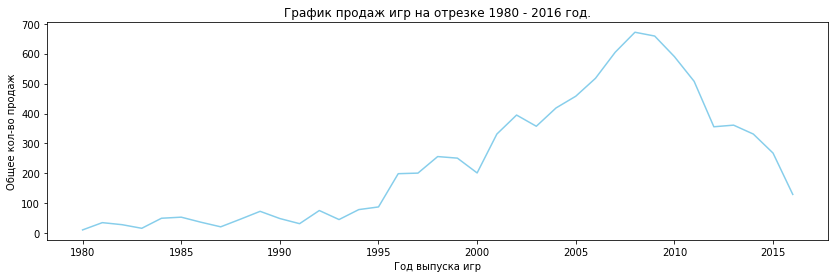

In [19]:
pivot_table_year = data.groupby('year_of_release').agg({'tot_sales':'sum', 'year_of_release':'median'})
plt.figure(figsize=(14,4))
sns.lineplot(x=pivot_table_year.year_of_release, y=pivot_table_year.tot_sales, color='skyblue');
plt.xlabel('Год выпуска игр')
plt.ylabel('Общее кол-во продаж')
plt.title('График продаж игр на отрезке 1980 - 2016 год.')
plt.show()

**Итог**: в соответствии с графиком, можно увидеть рост выпуска игр до 2009 года, затем начинается потепенное снижение. Это может быть связано со следющими факторами:
    
    1) Рост до 2009 года может быть связан, с менее затратными видами разработок (Flash), также не было резких скачков в используемых технологиях, из-за чего внутренние цепочки производства были во многом отлажены, не было требований перехода на новые "движки";
    2) Относительная "дешивизна" продуктов, по сравнению с 2015 г. (По сравнению с 2024 еще сильнее);
    3) Развитие технологий, что приводит к более сложной (новые "движки", оптимизация) и затратной разработке, увеличение персонала компаний, задействованных в создании продукта;
    4) Развитие сегмента видеоигр, развитие подклассов "игр" (АА,ААА и т.д.), бренда;
    5) Поглощение менее крупных компаний и их перезначение на поддержку существующих тайтлов, разработку внутренних проектов;
    6) Развитие live-servise проектов, развитие систем DLС, благодаря этому существующие тайтлы получают внутренние расширения, вместо прямого продолжения;

#### Изменение продаж по наиболее популярным платформам. 
<a id='live_platform'></a>

/tmp/ipykernel_389/35735731.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_five_platform.groupby(['year_of_release','platform'])['year_of_release','platform','tot_sales']


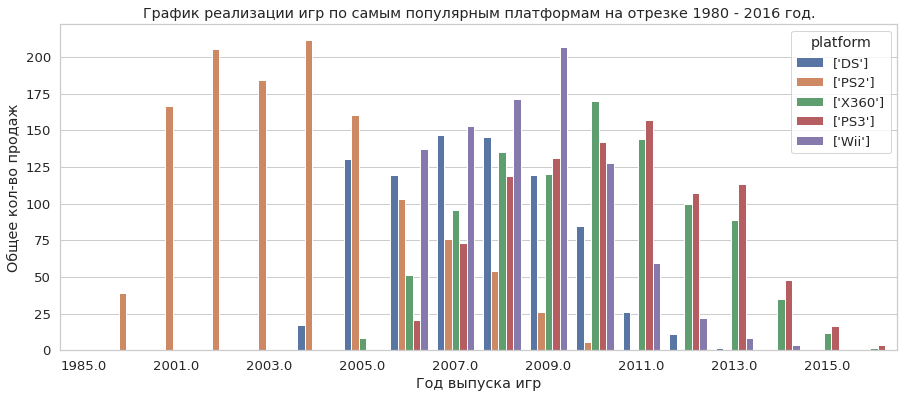

In [20]:
pivot_platform = (
    data.pivot_table(
        index=['platform'], values=['tot_sales'], 
        aggfunc={'tot_sales':'sum','platform':'unique'})
)

pivot_platform = pivot_platform.sort_values(by='tot_sales', ascending=False).head(5).index.tolist()

top_five_platform = data.query('platform in @pivot_platform')
top_five_platform = (
    top_five_platform.groupby(['year_of_release','platform'])['year_of_release','platform','tot_sales']
    .agg({'year_of_release':'median','platform':'unique','tot_sales':'sum'})
)

top_five_platform['platform'] = top_five_platform['platform'].astype(str)


plt.figure(figsize=(15,6))
sns.set(style="whitegrid", font_scale=1.2)
sns.barplot(data=top_five_platform, y='tot_sales', x='year_of_release', hue='platform',linewidth=1)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Год выпуска игр')
plt.ylabel('Общее кол-во продаж')
plt.title('График реализации игр по самым популярным платформам на отрезке 1980 - 2016 год.')
plt.show()

In [21]:
# создаем сет группировкой по платформам , значения их начальные и конечные даты продаж игр на платформе
active_years = data.groupby('platform')['year_of_release'].agg(['min', 'max']) 
# сет групировкой по платформам, значения суммарные продажи
total_sales = data.groupby('platform')['tot_sales'].sum()
# расчет "жизни" платформ
lifespan = active_years['max'] - active_years['min']
# создание сета из полученных ранее данных
platform_lifespan = pd.DataFrame({'lifespan': lifespan, 'total_sales': total_sales})
# для подсчета средней продолжительности используем median(), т.к. присутсвуют заниженные и завышенные значения (0, 31)
print(f"Средняя продолжительность жизни игровых платформ: {platform_lifespan['lifespan'].median()} лет")
display(platform_lifespan)

Средняя продолжительность жизни игровых платформ: 6.0 лет


,lifespan,total_sales
platform,,
2600,9.0,96.98
3DO,1.0,0.10
3DS,5.0,259.00
DC,10.0,15.95
DS,28.0,806.12
GB,13.0,255.46
GBA,7.0,317.85
GC,6.0,198.93
GEN,4.0,28.35


**Итог**: наиболее популярными платформами за весь рассматриваемыый период, являются консоли. Это характеризуется, тем что:

    1) Консоли первоначально скоструированы для комфортного запуска игр;
    2) Присутствуют "эксклюзивы" на определенных платформах;
    3) Эксплуатация поддерживается на большом отрезке времени, сл-но выпущенные ранее игры можно использовать вне зависимости от нового ПО.
    
Также в соответсвии с представленным выше графиком распределения, можно увидеть , что присутствует цикличность в жизни платформ. Так можно увидеть, что средняя продолжительность жизни платформ составляет 6 лет, при этом на крупных платформах (PS, Xbox, Nintendo) продажи в среднем составляю от 8 до 10 лет. Рост продаж происходит в первые **<u>5 лет</u>** "жизни" линейки консоли, затем происходит спад, это связано с тем, что с развитием технологием, происходит смена поколений, происходит переориентация на новые консоли.

#### Анализ актуального ранка 2014г. - 2016г. (прогноз на 2017г.)

Для прогноза на **2017г.**, следует провести анализ за последние 3 года, так можно будет увидеть картину распредления актуальных продаж и сделать прогнозы по стратегии продаж на 2017г.

/tmp/ipykernel_389/281473710.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analyse_2011_6.groupby(['year_of_release','platform'])['year_of_release','platform','tot_sales']


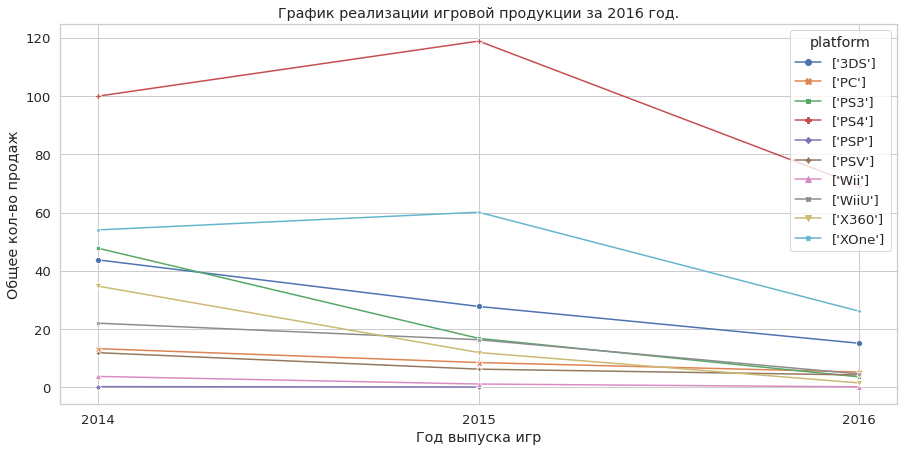

In [22]:
analyse_2011_6 = data.query('year_of_release.gt(2013)')

platform_analyse = (
    analyse_2011_6.groupby(['year_of_release','platform'])['year_of_release','platform','tot_sales']
    .agg({'year_of_release':'median','platform':'unique','tot_sales':'sum'})
)

platform_analyse['platform'] = platform_analyse['platform'].astype(str)



plt.figure(figsize=(15,7))
sns.lineplot(
    data=platform_analyse, x='year_of_release', y='tot_sales', 
    hue='platform', style='platform',markers=True, dashes=False
)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Год выпуска игр')
plt.ylabel('Общее кол-во продаж')
plt.title('График реализации игровой продукции за 2016 год.')
plt.show()

**Итого**: наиболее популярные платформы, которые могут принести потенциальную прибыль:

 - Playstation 4;
 - XBox One.
 
Также данные платформы **<u>2013 г.</u>**, они имеют потенциально еще 1-2 года актинвых продаж. Остальные платформы показывают незначительные продажи и спад интереса аудитории к ним. `WiiU`, который вышел в 2012 г., также имеет возможность принести прибыль в **2017г.**, однако данный вид консоли наименее популярен в Европейском и Американском регионе. `3DS` показывает ежегодный снижение продаж игр на консоли, при этом  старт был лучше, чем на PS4, XBox One. Это может быть следствие низкой эффективности перенсоной консоли, менее развитого рынка разработок игр.

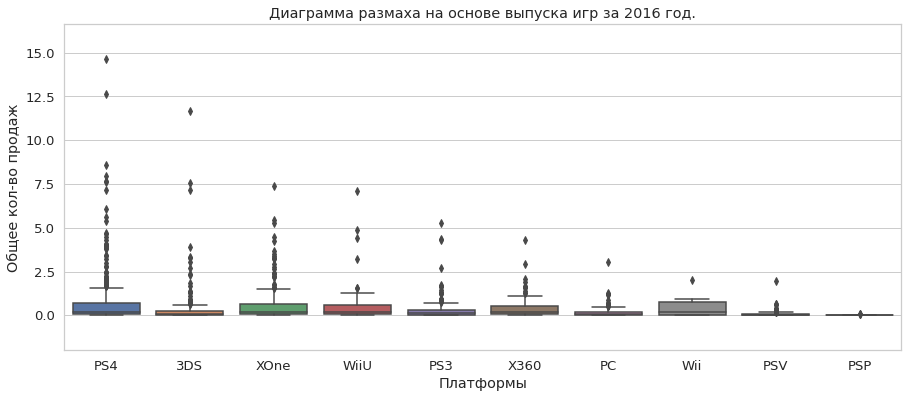

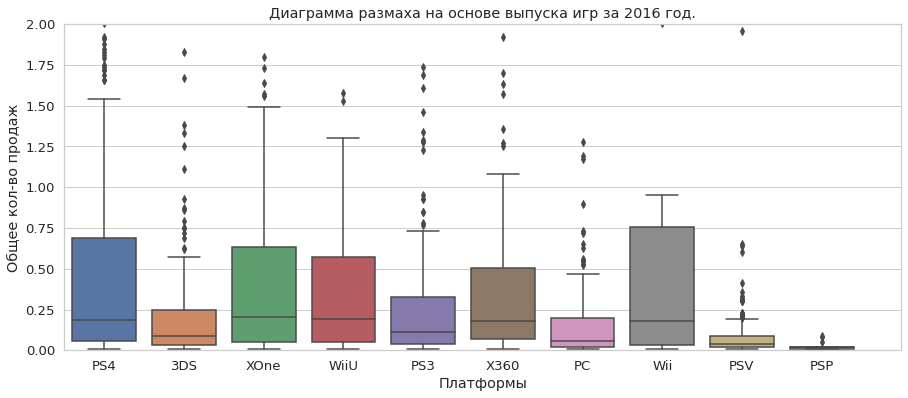

In [23]:
data_period = data.query('year_of_release.gt(2013)')
plt.figure(figsize=(15,6))
sns.boxplot(
    data=data_period, x='platform', y='tot_sales'
)
plt.ylim(-2, data_period['tot_sales'].max() + 2)
plt.xlabel('Платформы')
plt.ylabel('Общее кол-во продаж')
plt.title('Диаграмма размаха на основе выпуска игр за 2016 год.')
plt.show()


plt.figure(figsize=(15,6))
sns.boxplot(
    data=data_period, x='platform', y='tot_sales'
)


plt.ylim(0, 2)
plt.xlim(-0.5, 10)
plt.xlabel('Платформы')
plt.ylabel('Общее кол-во продаж')
plt.title('Диаграмма размаха на основе выпуска игр за 2016 год.')
plt.show()

**Итого**: по диаграмме размаха, можно подвести следующие выводы:
- Playstation 4 и XBox One, WiiU имеют наиболее высокие медианные показатели продаж игр по всем представленным платформам;
- PSV,  PSP  имеют **наименьшие** показатели продаж игр;
- Выпуск игр на Playstation 2, PSP полностью прекратился;
- Выбросы на PS4 - PS3, Xbox One - Xbox 360, возможно характеризуются выпуском игр на нескольких консолях;
- Playstation 4, XBox One, WiiU из представленных на диаграме размаха, имеют наибольшие показатели медианы, что должно сигнализировать о том что из-за новизны консолей они будут набирать рост продаж;
- **`Playstation 4`** имеет наибольшее плечо продаж, что свидетельствует о популярности платформы на рассматриваемой участке дат и популярности игр;

#### Анализ влияния оценок критиков и игроков на продажи на основе (Playstation 4)

Для наиболее лучшей оценки взаимосвязи между оценками и продажами, следует взять Playstation 4, так как наибольшее кол-во игр выходило на данной платформе за рассматриваемый период.

0.40266141068104083
-0.040131589472697356


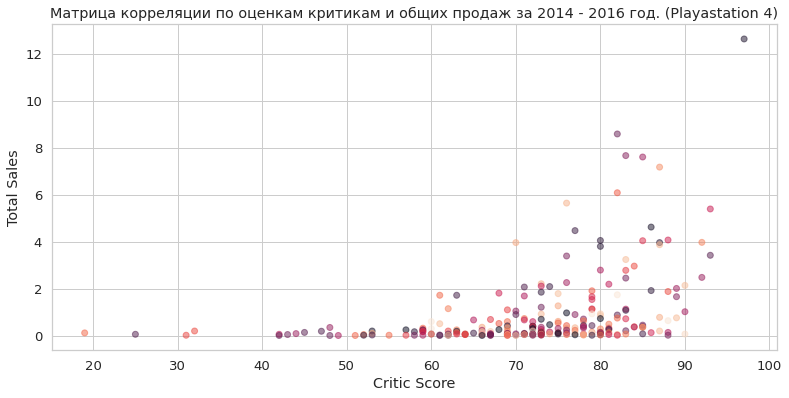

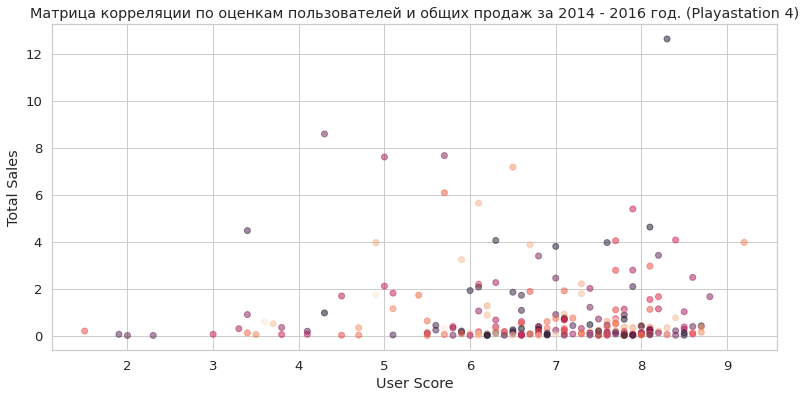

In [24]:
analyse_ps4 = analyse_2011_6.query('platform == "PS4"')
print(analyse_ps4['critic_score'].corr(analyse_ps4['tot_sales']))
print(analyse_ps4['user_score'].corr(analyse_ps4['tot_sales']))


colors = np.random.rand(len(analyse_ps4))
plt.figure(figsize=(13, 6))
plt.scatter(analyse_ps4['critic_score'], analyse_ps4['tot_sales'], c=colors, alpha=0.5)
plt.title('Матрица корреляции по оценкам критикам и общих продаж за 2014 - 2016 год. (Playastation 4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()


plt.figure(figsize=(13, 6))
plt.scatter(analyse_ps4['user_score'], analyse_ps4['tot_sales'],c=colors, alpha=0.5)
plt.title('Матрица корреляции по оценкам пользователей и общих продаж за 2014 - 2016 год. (Playastation 4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()

**Итого**: присутствует <u>слабая положительная корреляция</u> между оценками критиков и общими продажами игр, а также <u>очень слабая отрицательная корреляция</u> между оценками игроков и общими продажами игр. Это дает понять, что на данный момент критики имеют небольшое влияние на аудиторию, при этом оценки пользователей не влияют сильно. 

Возможны следующие причины :
- В период с 2011-2014 года только начиналось развитие агрегаторов оценок пользователей и критиков, сл-но эффект был минимален на принимаемые игроком решения;
- Популярные серии игр, как и масштабная рекламная кампания, побуждали игроков приобретать игры на старте, не волнуясь о качестве продукта;
- Не был развит развлекательный сегмент, нацеленный на обзор игр, прохождение и т.д., пользователи не могли оценить продукт объективно с других источников.

Соотнесем выводы с продажами игр на других платформах.

In [25]:
for name_console in data['platform'].unique():
    print('\n')
    print(f'\033[1m{name_console}\033[0m')
    correlation_matrix = data[data['platform'] == name_console][['critic_score', 'user_score', 'tot_sales']].corr()
    print(correlation_matrix)



Wii
              critic_score  user_score  tot_sales
critic_score      1.000000    0.681846   0.177560
user_score        0.681846    1.000000   0.112414
tot_sales         0.177560    0.112414   1.000000


NES
              critic_score  user_score  tot_sales
critic_score           NaN         NaN        NaN
user_score             NaN         NaN        NaN
tot_sales              NaN         NaN        1.0


GB
              critic_score  user_score  tot_sales
critic_score           NaN         NaN        NaN
user_score             NaN         NaN        NaN
tot_sales              NaN         NaN        1.0


DS
              critic_score  user_score  tot_sales
critic_score      1.000000    0.655516   0.236379
user_score        0.655516    1.000000   0.130436
tot_sales         0.236379    0.130436   1.000000


X360
              critic_score  user_score  tot_sales
critic_score      1.000000    0.618101   0.393736
user_score        0.618101    1.000000   0.114459
tot_sales         0.3

**Итого**: различия проявляются в зависимости от наравления рынка реализации, так наиболее выраженная положительная зависимость между оценками игроков и критиков проявляется на консолях вида **<u>3DS, DC</u>**

#### Анализ популярности жанров.

In [26]:
analyse_2011_6.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'tot_sales', 'age_rating'],
      dtype='object')

/tmp/ipykernel_389/2985481621.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analyse_2011_6.groupby(['genre','platform'])['genre', 'platform', 'tot_sales']


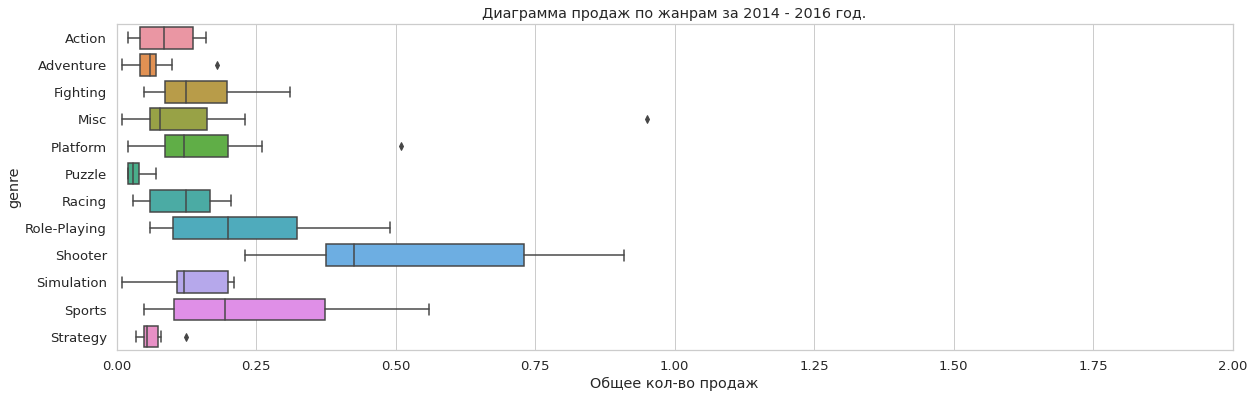

In [27]:
genre_analyse = (
    analyse_2011_6.groupby(['genre','platform'])['genre', 'platform', 'tot_sales']
    .agg({'genre':'unique','platform':'unique', 'tot_sales':'median'})
)
genre_analyse[['genre','platform']] = genre_analyse[['genre','platform']].astype(str).index.tolist()

plt.figure(figsize=(20,6))
sns.set(style="whitegrid", font_scale=1.2)
sns.boxplot(data=genre_analyse, y='genre', x='tot_sales')
plt.xlim(0, 2)
plt.xlabel('Жанр игр')
plt.xlabel('Общее кол-во продаж')
plt.title('Диаграмма продаж по жанрам за 2014 - 2016 год.')
plt.show()                     

**Итого**: 

Наиболее прибыльные жанры:

 - Platfotm, Shooter, Role-Playing, Sports, Fighting.
 
Данные жанры показывают наиболее высокий спрос пользователей, также  в данных жанрах присутствуют наиболее популярные тайтлы и серии (Halo - Xbox, Tekken - PS, Dragon Quest - 3DS). 

Наименее прибыльные жанры:

 - Puzzle, Strategy, Adventures;
 
 
Также есть выбросы, по жанрам: Stategy, Platform, Misc, Adventure. Это показатель того, что на некоторых платформах данные жанры имееют более высокие показатели прибыли, чем на большинстве анализируемых.

С помощью диаграмы размаха, были выявлены как наиболее популярные жанры, так и менее популярные жанры.

### Исследование региона продаж
----
<a id='forth'></a>

#### Анализ популярных платформ по регионам

In [28]:
usa_popular_platforms = (
    data.query('year_of_release.gt(2013) and na_sales.ne(0)')[['name', 'platform', 'year_of_release',
                    'genre', 'na_sales','rating', 'age_rating']]
)

eu_popular_platforms = (
    data.query('year_of_release.gt(2013) and eu_sales.ne(0)')[['name', 'platform', 'year_of_release',
                    'genre', 'eu_sales','rating', 'age_rating']]
)

jp_popular_platforms = (
    data.query('year_of_release.gt(2013) and jp_sales.ne(0)')[['name', 'platform', 'year_of_release',
                    'genre', 'jp_sales','rating', 'age_rating']]
)

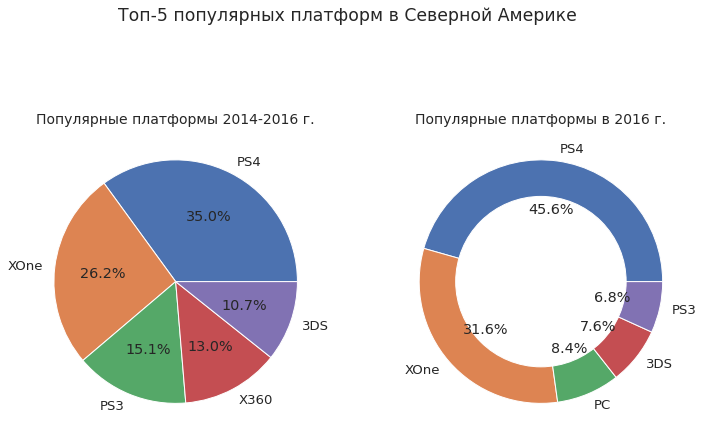

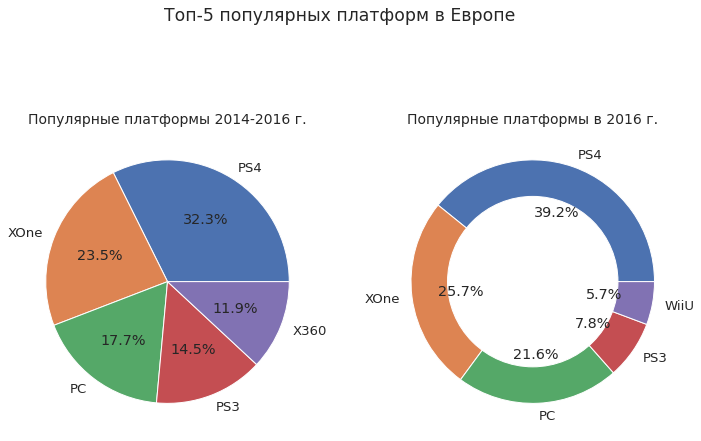

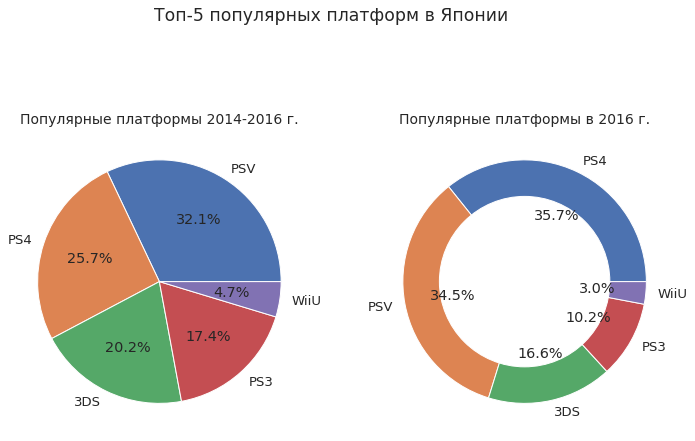

In [29]:
def create_graph(data):
    if data.equals(usa_popular_platforms):
        name = 'Северной Америке'
    elif data.equals(eu_popular_platforms):
        name = 'Европе'
    elif data.equals(jp_popular_platforms):
        name = 'Японии'
    else:
        name = 'Неизвестно'        
    
    most_popular_all = data['platform'].value_counts().head(5)
    most_popular_16 = data.query('year_of_release.eq(2016)')['platform'].value_counts().head(5)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    plt.suptitle(f'Топ-5 популярных платформ в {name}')
    ax1.pie(most_popular_all, labels=most_popular_all.index, autopct='%1.1f%%')
    ax1.set_title('Популярные платформы 2014-2016 г.', fontsize=14)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    ax2.pie(most_popular_16, labels=most_popular_16.index, autopct='%1.1f%%')
    ax2.set_title('Популярные платформы в 2016 г.', fontsize=14)
    plt.show()


create_graph(usa_popular_platforms)
create_graph(eu_popular_platforms)
create_graph(jp_popular_platforms)

**Итого**: в соответсвии с регионами рынков продаж, можно сделать следующие выводы по полуряности платформ:

1) По популярности платформ за **2014 - 2016** год,  в <u>Северной Америке и Европе</u> больше 50 % занимают `Playstation 4`, `XBox One`. При этом в Европе наравне с консолями, популярна `РС` (~17.7%), в **2016** году в Северо-Американском регионе также заметный рост показывает `РС` (8.4%). Также на момент **2016** года, `Playstation 4` и `XBox One` занимают более половины рынка продаж (в Северной Америке более 70% и в Европе более 60%). На обоих рынках к **2016** году заметное снижение популярности у `3DS`.

2) В <u>Японии</u> присутствует заметное предпочтение местным платформам семейств Playstation, Nintendo. На **2016** год больше половины рынка занимают `PSV`, `3DS`, `WiiU` (56%). Данные консоли выделяются  "переносным" форматом, что показывает тенденции и предпочтения японских игроков к определенным жанрам, распространеннных на данных платформах. В отличии от Европейского региона и Северо-Американского региона платформа `3DS` занимает существенное место по поулярности в Японии.

3) На **2016** год во всех регионах 1/3 рынка занимает **`Playstation 4`**.

#### Анализ популярных жанров по регионам

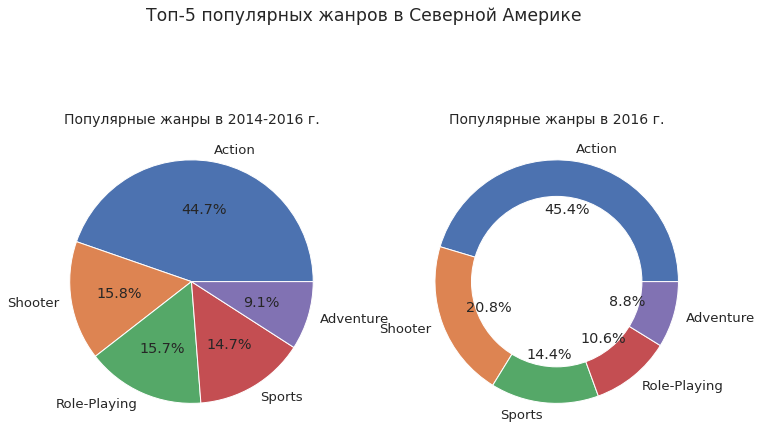

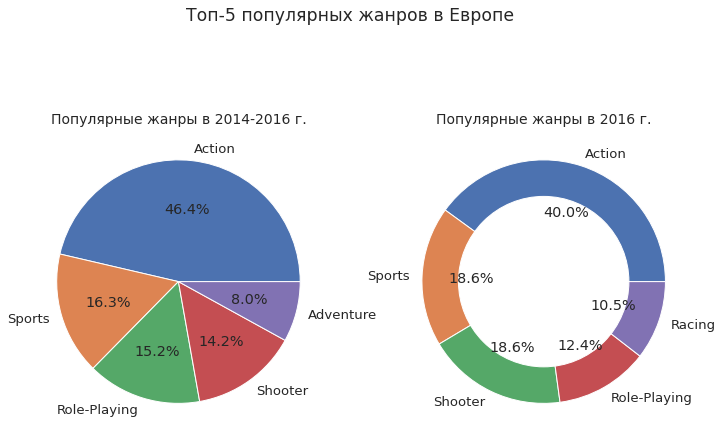

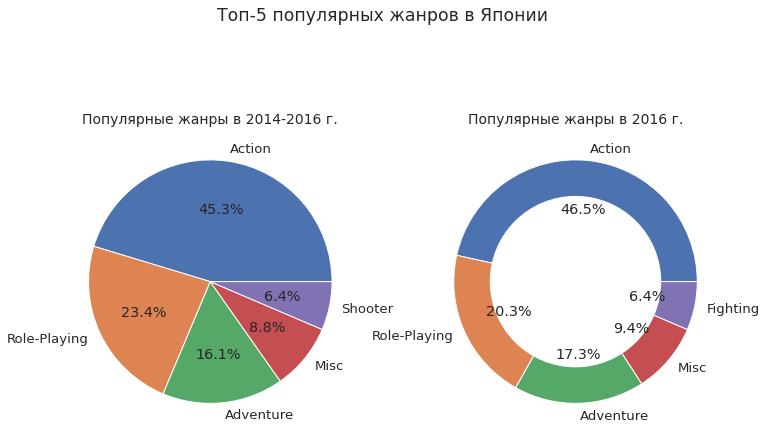

In [30]:
def create_genre(data):
    if data.equals(usa_popular_platforms):
        name = 'Северной Америке'
    elif data.equals(eu_popular_platforms):
        name = 'Европе'
    elif data.equals(jp_popular_platforms):
        name = 'Японии'
    else:
        name = 'Неизвестно'

    most_popular_all = data['genre'].value_counts().head(5)
    most_popular_16 = data.query('year_of_release.eq(2016)')['genre'].value_counts().head(5)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    plt.suptitle(f'Топ-5 популярных жанров в {name}')
    ax1.pie(most_popular_all, labels=most_popular_all.index, autopct='%1.1f%%')
    ax1.set_title('Популярные жанры в 2014-2016 г.', fontsize=14)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    ax2.pie(most_popular_16, labels=most_popular_16.index, autopct='%1.1f%%')
    ax2.set_title('Популярные жанры в 2016 г.', fontsize=14)
    plt.show()

    
create_genre(usa_popular_platforms)
create_genre(eu_popular_platforms)
create_genre(jp_popular_platforms)

**Итого**: наиболее популярные игровые жанры за период **2014 - 2016** г. во всех регионах:

- Action;          
- Role-Playing;
- Shooter;
- Adventure.

При этом при рассмотрении популярных жанров в **2016** году можно отметить, что:

1) Во всех трех расматриваемых регионах, самый популярный жанр - `Action` (свыше **40%**);

2) В европейском и северо-американском регионе доля жанров `Shooter`, `Sports`, `Role-Playing` приблизительно одинакова;

3) В Японии `Role-Playing` популярнее, чем в европейском и северо-американском регионе на 10%, также популярен жанр `Adventure`, `Misc`. Данные  жанры популярны из-за популярности портативных игровых устройств (PSV, 3DS, WiiU).

4) Также в европейском и японском регионе есть жанры не повторяющиеся в других регионах:
 - В европейском регионе жанр `Racing` (**10%**);
 
 - В японском регионе жанр `Misc`, `Fighting` (**15,8%**).

#### Оценка влияния рейтинга ESRB на продажи в регионах

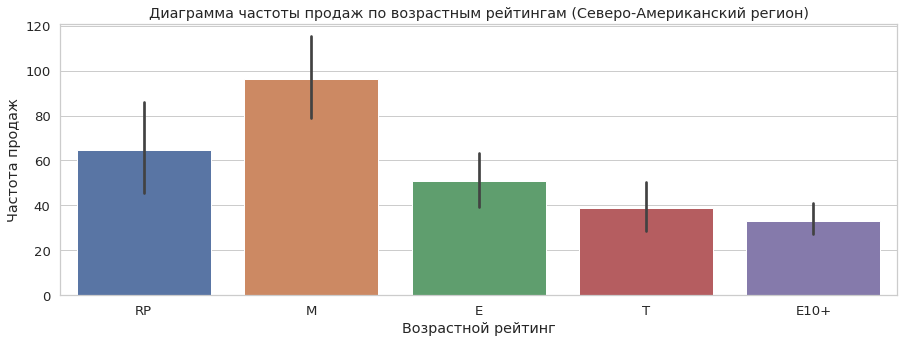

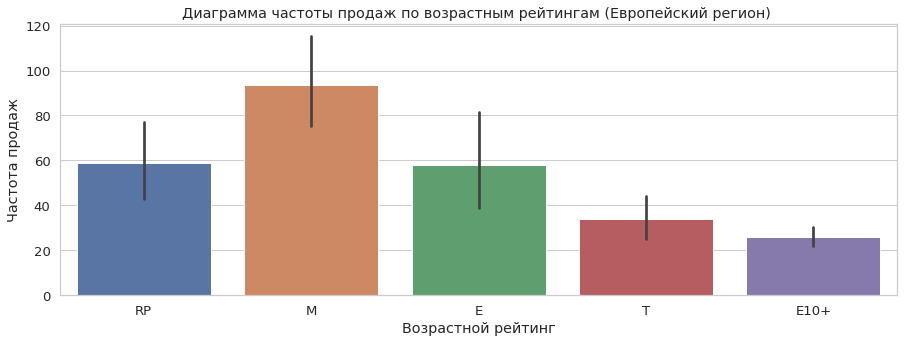

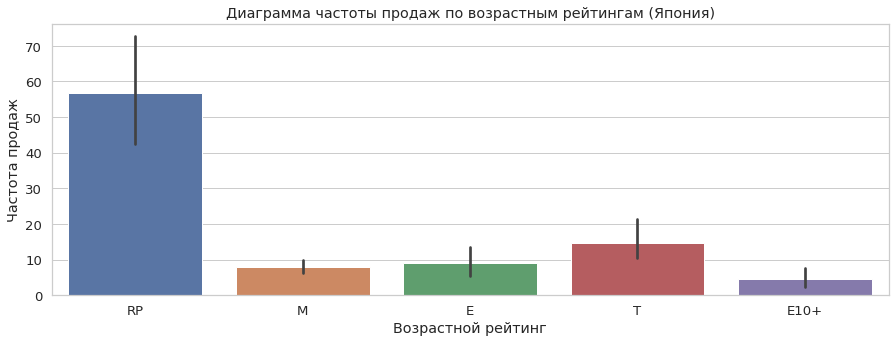

In [31]:
esrb_raiting = usa_popular_platforms
plt.figure(figsize=(15,5))
sns.barplot(data=esrb_raiting, x="rating", y='na_sales', estimator=np.sum);
plt.xlabel('Возрастной рейтинг')
plt.ylabel("Частота продаж")
plt.title("Диаграмма частоты продаж по возрастным рейтингам (Северо-Американский регион)")

esrb_raiting = eu_popular_platforms
plt.figure(figsize=(15,5))
sns.barplot(data=esrb_raiting, x="rating", y='eu_sales', estimator=np.sum);
plt.xlabel('Возрастной рейтинг')
plt.ylabel("Частота продаж")
plt.title("Диаграмма частоты продаж по возрастным рейтингам (Европейский регион) ")

esrb_raiting = jp_popular_platforms
plt.figure(figsize=(15,5))
sns.barplot(data=esrb_raiting, x="rating", y='jp_sales', estimator=np.sum);
plt.xlabel('Возрастной рейтинг')
plt.ylabel("Частота продаж")
plt.title("Диаграмма частоты продаж по возрастным рейтингам (Япония)");

**Итого**: По построенным графикам можно подвести следующие итоги:

- Игры имеющие рейтинг **E (0+)** одни из наиболее популярных в северо-американском и европейском регионе, в Япоснокм регионе рейтинг Е является вторым по популярности среди игр, имеющих рейтинг;
- В европейском и северо-американском регионе наиболее популярный рейтинг - **M (17+)**;
- Рейтинг **E10+, T (10+, 13+)** равномерно представлены в северо-американском и европейском регионе, в Японском регионе рейтинг T (10+, 13+) самый популярный среди игр, имеющих рейтинг;
- В каждом регионе присутствует рейтинг RP, то есть игры не прошедшие аттестацию рейтинга, но в Японии таких игр подавляющее большинство. Это может быть следствием того, что подавляющее число игр созданных в Японии, не используют рейтинг ESRB.

### Проверка гипотез
----
<a id='fifth'></a>

#### Проверка гипотезы о равенстве пользовательских рейтингов Xbox One, PC

Гипотеза: **H0** (нулевая гипотеза) - пользовательские рейтинги Xbox One равны пользовательским оценкам PC, **H1** (альтернативная гипотеза) - пользовательские рейтинги Xbox One отличаются от пользовательских рейтингов PC.

p-value: 0.11601398086668832
Нет оснований отвергунуть нулевую гипотезу

Средний рейтинг пользователей на Xbox One: 6.8
Средний рейтинг пользователей на PC: 6.8


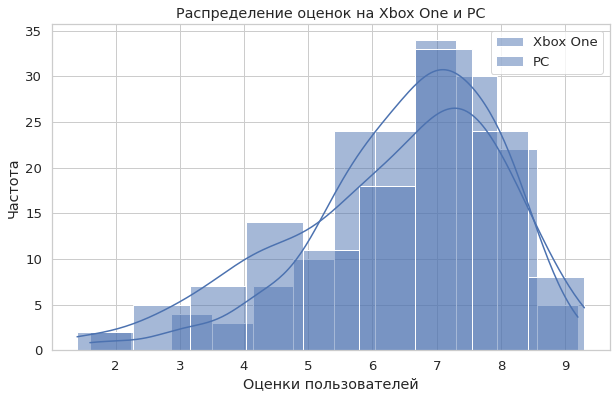

In [32]:
rating_xbox_one = analyse_2011_6.query('platform.eq("XOne")')['user_score'].dropna()
rating_pc = analyse_2011_6.query('platform.eq("PC")')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(rating_xbox_one, rating_pc, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергунуть нулевую гипотезу')
      

print(f'\nСредний рейтинг пользователей на Xbox One: {rating_xbox_one.median()}') 
print(f'Средний рейтинг пользователей на PC: {rating_pc.median()}')   
        
plt.figure(figsize=(10, 6))
sns.histplot(rating_xbox_one, kde=True, label='Xbox One')
sns.histplot(rating_pc, kde=True, label='PC')
plt.legend()
plt.title('Распределение оценок на Xbox One и PC')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота')
plt.show()

**Итог**: нет оснований отвергнуть нулевую гипотезу о равенстве средних пользовательских оценок на платформах Xbox One и PC. Сл-но с большей долей вероятности средние пользовательские оценки не имеют статистически значимых отличий.

#### Проверка гипотезы о различии средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).

Гипотеза: **H0** (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports равные, **H1** (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports различаются.

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу

Средний рейтинг пользователей жанра Action: 7.1
Средний рейтинг пользователей жанра Sports: 5.5


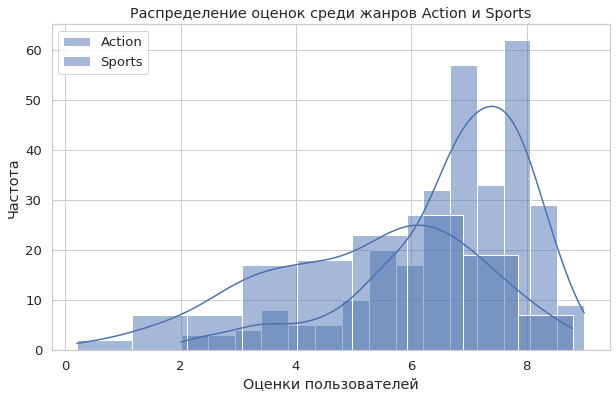

In [33]:
rating_action = analyse_2011_6.query('genre.eq("Action")')['user_score'].dropna()
rating_sports = analyse_2011_6.query('genre.eq("Sports")')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(rating_action, rating_sports, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')
    
    
print(f'\nСредний рейтинг пользователей жанра Action: {rating_action.median()}') 
print(f'Средний рейтинг пользователей жанра Sports: {rating_sports.median()}')


plt.figure(figsize=(10,6))
sns.histplot(data=rating_action, kde=True, label='Action')
sns.histplot(data=rating_sports, kde=True, label='Sports')

plt.legend()
plt.title('Распределение оценок среди жанров Action и Sports')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота')
plt.show()

**Итого**: В соответвствии с проверкой гипотезы, можно сделать вывод, что оценки жанра Action не равны Sports. Согласно графику распределений и проверки среднего, можно сделать вывод, что средние оценки Action выше, чем Sports.

### Вывод
----
<a id='total'></a>

В ходе исследования, интернет-магазина **<u>"Стримчик"</u>**, были проанализированы различные критерии.

Рост выпуска игр возрастал до **2010** года, затем начался постепенный спад.Это может быть связано со следющими факторами:

1) Рост до 2009 года может быть связан, с менее затратными видами разработок (Flash), также не было резких скачков в используемых технологиях, из-за чего внутренние цепочки производства были во многом отлажены, не было требований перехода на новые "движки";

2) Относительная "дешивизна" продуктов, по сравнению с 2016 г.;

3) Развитие технологий, что приводит к более сложной (новые "движки", оптимизация) и затратной разработке, увеличение персонала компаний, задействованных в создании продукта;

Наиболее популярными платформами за весь рассматриваемый период, являются консоли. Это характеризуется, тем что:

1) Консоли первоначально скоструированы для комфортного запуска игр;

2) Присутствуют "эксклюзивы" на определенных платформах;

3) Эксплуатация поддерживается на большом отрезке времени, сл-но выпущенные ранее игры можно использовать вне зависимости от нового ПО.

Рост продаж происходит в первые **5 лет** "жизни" линейки консоли, затем происходит спад, это связано с тем, что с развитием технологием, происходит смена поколений, происходит переориентация на новые консоли.

На **2016** год наибольшее кол-во продаж приходится на **`Playstation 4`**.

1) Также на момент **2016** года, <u>Playstation 4 и XBox One</u> занимают более половины рынка продаж (в Северной Америке более **70%** и в Европе более **60%**). На обоих рынках к **2016** году заметное снижение популярности у <u>3DS</u>.

2) В японсоком регионе в период **2016** года больше половины рынка занимают <u>PSV, 3DS, WiiU</u> (**54,1%**). Данные консоли выделяются "переносным" форматом, что показывает тенденции и предпочтения японских игроков к определенным жанрам, распространеннных на данных платформах. В отличии от Европейского региона и Северо-Американского региона платформа <u>3DS</u> занимает существенное место по поулярности в Японии.

3) На **2016** год во всех регионах 1/3 рынка занимает **`Playstation 4`**.

При рассмотрении популярных жанров в **2016** году можно отметить, что:

1) Во всех трех расматриваемых регионах, самый популярный жанр - **<u>Action</u>** (свыше **40%**);

2) В европейском и северо-американском регионе доля жанров <u>Shooter, Sports, Role-Playing</u> приблизительно одинакова;

3) В Японии <u>Role-Playing</u> популярнее, чем в европейском и северо-американском регионе на **10%**, также популярен жанр <u>Adventure, Misc</u>. Данные жанры популярны из-за популярности портативных игровых устройств (PSV, 3DS, WiiU).

4) В европейском и японском регионе есть жанры не повторяющиеся в других регионах:
- В европейском регионе жанр <u>Racing</u> (**10%**);
- В японском регионе жанр <u>Misc, Fighting</u> (**15,8%**).


Оценки пользователей и критиков не сильно влияют на продажи игр. 
Средние оценки жанра **Action** выше, чем жанра **Sports**, при этом популярность жанра Sports остается высоким. В данном сегменте выпуском спортивных игр, занимается небольшое кол-во компаний, имеющих лицензии от "фирменных" лиг - одна. Сл-но развитие и улучшение могут быть минимальными или отсутствовать, что приводит к низким рейтингам, но при неимении альтернатив пользователи все равно покупают новые продукты в жанре Sports.


В соответствии с приведенным выше итогом, следует обобщить данные и предложить стратегию по продажам игр на **2017** год:

1) Наиболее популярной платоформой представленной во всех расматриваемых регионах является **`Playstation 4`**;

2) Жанры, на которые стоит выделить дополнительные средства для продвижения и имеющие высокую прибыльность во всех представленных регионах (**Platfotm, Shooter, Role-Playing, Sports, Fighting**);

3) [Исследование](#live_platform) показало, что плафтормы "нового" поколения показывают рост продаж в течении 5 лет, сл-но текущее семейство консолей, будет популярно еще на протежении 2-3 лет.

Стратегия продвижения в зависимости от региона:

- В **<u>Cеверо-Aмериканском регионе</u>**, следует соссредоточиться на жанрах <u>Action, Shooter, Sports и Role-Playing</u>. Наиболее популярными платформами являются `Playstion 4`, `Xbox One` (более **70%** рынка). Следует отслеживать рост заинтересованности игроков `РС` платформой (**8.4%**), которая к 2016 году, вошла в топ-5 платформ по популярности. Рейтинг **17+(M) и E(0+)** является одним из самых популярных жанров, остальные рейтинги распределены равномерно. Также следует сделать примечание, в соответсвии с анализом рейтинга ***ESRB*** по северо-американскому региону, было видно что рейтинг 0+ (E, EC) популярнее в совокупных продажах, чем рейтинг 17+(М). В данном случае, рассматривать рейтинг ЕС не следует, из-за падения популярности японских портативных коснолей и игр на них.

- В **<u>Eвропейском регионе</u>**, наиболее популярные жанры будут повторяться, с уточнением, что одним из популярных региональных жанров является <u>Racing</u> (**10.5%**). В отличии от северо-американского региона, в европейском регионе представлены 3 наиболее популярных платформы : `Playstion 4`, `Xbox One`, `PC`(**39.2%, 25.7%, 21.6%** соответственно). В отличии от северо-американского рынка, РС платформа более распространена и популярна в европейском сегменте. Рейтинг имеющий наибольшую популярность **17+(M) и EC** остальные рейтинги не имеют сильных различий по популярности между собой.

- **<u>Японский регион</u>** отличается от ранее описанных своими предпочтениями к переносным платформам: `Playstation Vita`, `3DS`, `WiiU`. Также 1/3 рынка занимают продажи на Playstation 4. Наиболее популярными жанрами остаются <u>Action и Role-Playing</u>, при этом следует скорректировать стратегию из-за распрастраненности жанра <u>Adventure, Misc и Faigting</u>. Наиболее популярный рейтинг по продажам **Т(10+, 13+)**.

